In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/ferdataset.zip

In [1]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    fig.savefig('plot.png')
    plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = 'train'
val_dir = 'test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
448/448 [==============================] - 14s 24ms/step - loss: 1.7972 - accuracy: 0.2614 - val_loss: 1.6862 - val_accuracy: 0.3573
Epoch 2/50
448/448 [==============================] - 10s 23ms/step - loss: 1.6206 - accuracy: 0.3713 - val_loss: 1.5442 - val_accuracy: 0.4142
Epoch 3/50
448/448 [==============================] - 10s 23ms/step - loss: 1.5167 - accuracy: 0.4197 - val_loss: 1.4476 - val_accuracy: 0.4534
Epoch 4/50
448/448 [==============================] - 10s 23ms/step - loss: 1.4437 - accuracy: 0.4504 - val_loss: 1.3852 - val_accuracy: 0.4669
Epoch 5/50
448/448 [==============================] - 11s 24ms/step - loss: 1.3821 - accuracy: 0.4743 - val_loss: 1.3323 - val_accuracy: 0.4912
Epoch 6/50
448/448 [==============================] - 11s 24ms/step - loss: 1.3332 - accuracy: 0.4943 - val_loss: 1.2958 - val_accuracy: 0.5036
Epoch 7/50
448/448 [==============================] - 11s 24ms/step - loss: 1.2868 - accuracy: 0.5136 - val_loss: 1.2636 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


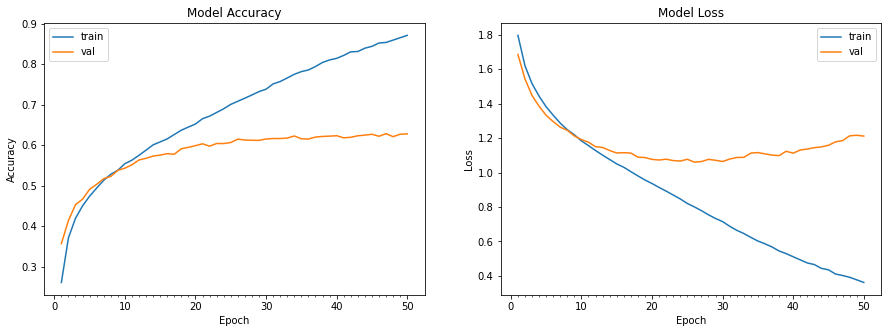

In [6]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)

plot_model_history(model_info)
model.save_weights('model.h5')

In [7]:
model.save('ferdetect.h5')

In [8]:
test_loss,test_acc = model.evaluate(validation_generator,verbose=2)
print('\nTest Accuracy:',test_acc)

113/113 - 2s - loss: 1.2147 - accuracy: 0.6275

Test Accuracy: 0.6274728178977966


In [9]:
test_loss,test_acc = model.evaluate(train_generator,verbose=2)
print('\nTrain Accuracy:',test_acc)

449/449 - 6s - loss: 0.1292 - accuracy: 0.9820

Train Accuracy: 0.9819568991661072
